<a href="https://colab.research.google.com/github/abhishek-kashyap1997/MachineLearningProjects/blob/main/Airline_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, and it will be a different story.

To solve this problem, we have been provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities, using which we aim to build a model which predicts the prices of the flights using various input features.

# Following is the description of features available in the dataset –

1. Airline: The name of the airline.

2. Date_of_Journey: The date of the journey

3. Source: The source from which the service begins.

4. Destination: The destination where the service ends.

5. Route: The route taken by the flight to reach the destination.

6. Dep_Time: The time when the journey starts from the source.

7. Arrival_Time: Time of arrival at the destination.

8. Duration: Total duration of the flight.

9. Total_Stops: Total stops between the source and destination.

10. Additional_Info: Additional information about the flight

11. Price: The price of the ticket

# Work Flow
1. Exploratory data analysis

2. Outlier detection and skewness treatment

3. Encoding the data

4. Scaling the data 

5. Fitting the machine learning models

6. Cross-validation of the selected model

7. Model hyper-tuning

8. Saving the final model

In [101]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
df = pd.read_excel(r'/content/Data_Train.xlsx')

# Exploratory Data Analysis

In [103]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [106]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Dealing with null values

In [107]:
#checking null values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [108]:
#Since null values are very less in number so can remove them
df.dropna(inplace=True)

In [109]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [110]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [111]:
# This function will change data type from object to dattime 
def changeToDatetime(col):
  df[col] = pd.to_datetime(df[col])

In [112]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [113]:
#Since these should be of datatime and can process further 
for col in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  changeToDatetime(col)

In [114]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Data Extraction 

In [115]:
#Extarcting day and month from Date_of_Journey
df['Journey_Day'] = df['Date_of_Journey'].dt.day

In [116]:
df['Journey_Month']=df['Date_of_Journey'].dt.month

In [117]:
# Dropping Date_of_Journey since we extracted data from it
df.drop('Date_of_Journey', axis=1, inplace=True)

In [118]:
#Extracting min and hour from Dep_time
def extractHour(df,col):
  df[col+'_Hour'] = df[col].dt.hour

In [119]:
def extractMinute(df,col):
  df[col+'_Min'] = df[col].dt.minute

In [120]:
def dropCol(df,col):
  df.drop(col, axis=1, inplace=True)

In [121]:
extractHour(df,'Dep_Time')
extractMinute(df,'Dep_Time')
dropCol(df,'Dep_Time')

In [122]:
df.corr()['Price'].abs().sort_values()

Dep_Time_Hour    0.006799
Journey_Month    0.010705
Dep_Time_Min     0.024458
Journey_Day      0.165448
Price            1.000000
Name: Price, dtype: float64

In [123]:
#Similarlry treating Arrival_Time
extractHour(df,'Arrival_Time')
extractMinute(df,'Arrival_Time')
dropCol(df,'Arrival_Time')

In [124]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [125]:
#Dealing with 0 hour and 0 min case in Duration
duration = list(df['Duration'])

for i in range(len(duration)):
  if len(duration[i].split()) == 2:
    pass
  else:
    if 'h' in duration[i]:
      duration[i]= duration[i]+' 0m'
    else:
      duration[i] = '0h '+ duration[i]

In [126]:
df['Duration'] = duration

In [127]:
# Extracting hour and min from Duration
def hour(x):
  return x.split()[0][0:-1]

In [128]:
def min(x):
  return x.split()[1][0:-1]

In [129]:
df['Duration_hour'] = df['Duration'].apply(hour)
df['Duration_min'] = df['Duration'].apply(min)


In [130]:
dropCol(df,'Duration')

In [131]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [132]:
def changeDtype(col):
  if df[col].dtypes == 'O':
    df[col] = df[col].astype(int)

In [133]:
changeDtype('Duration_hour')
changeDtype('Duration_min')

In [134]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_Day           int64
Journey_Month         int64
Dep_Time_Hour         int64
Dep_Time_Min          int64
Arrival_Time_Hour     int64
Arrival_Time_Min      int64
Duration_hour         int64
Duration_min          int64
dtype: object

Separating categorical and numerical columns

In [135]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
cont_col = [col for col in df.columns if df[col].dtype != 'O']

In [136]:
categorical_data = df[cat_col]
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [137]:
categorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Data Visulization and Pre-processing

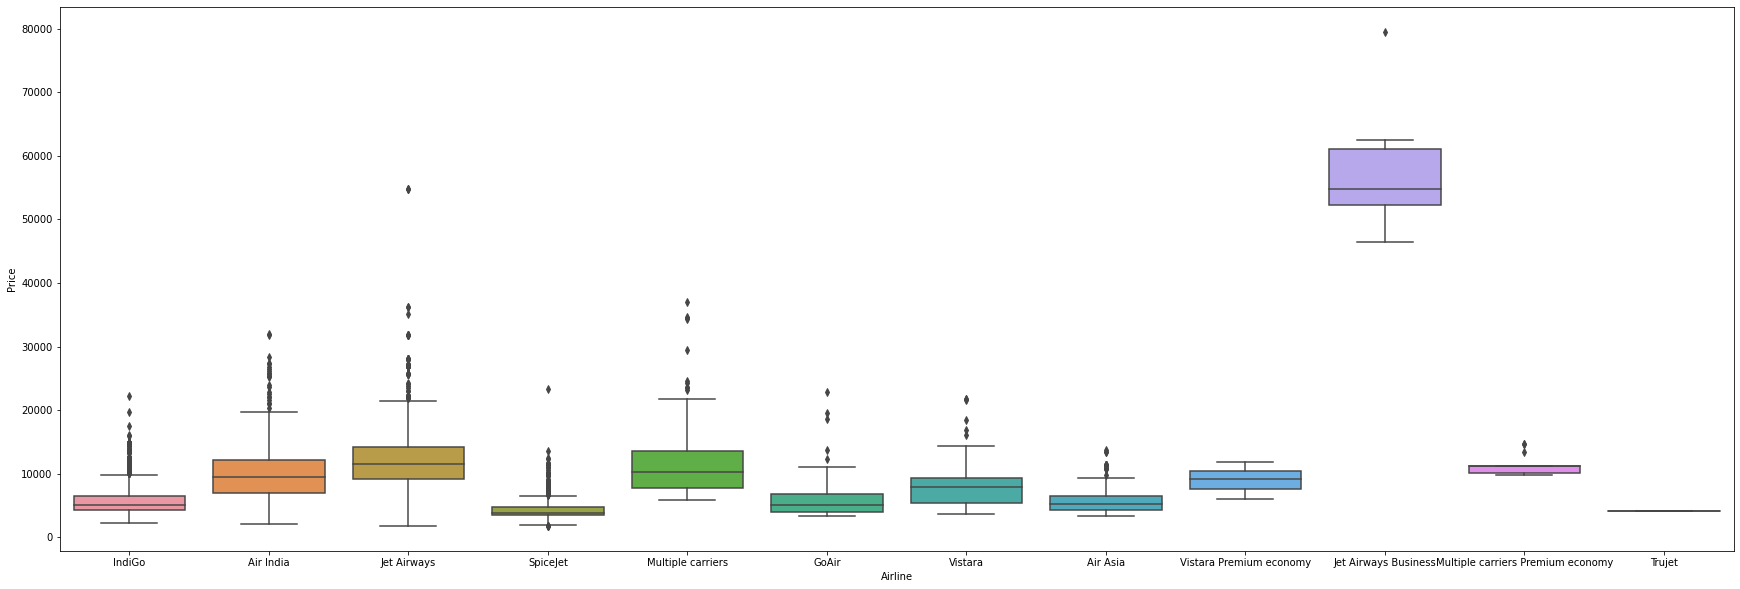

In [138]:
#Airlines vs Price Analysis
plt.figure(figsize = (30,10))
sns.boxplot(x='Airline', y='Price',data=df)

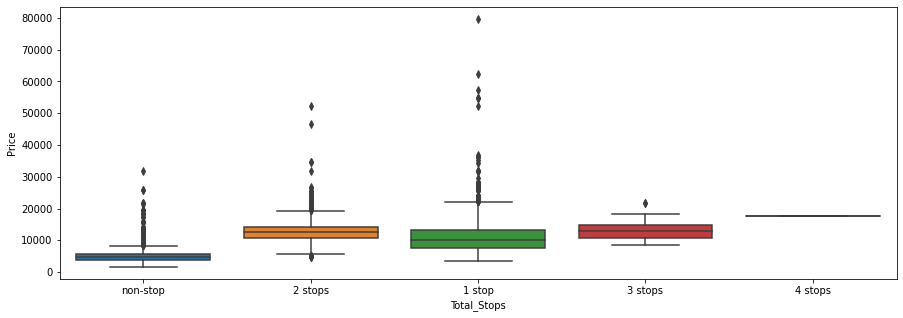

In [139]:
#Total_stops vs Price
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=df)

Label Encoding

In [140]:
#OneHotEncoding
Airline = pd.get_dummies(categorical_data['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [141]:
categorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

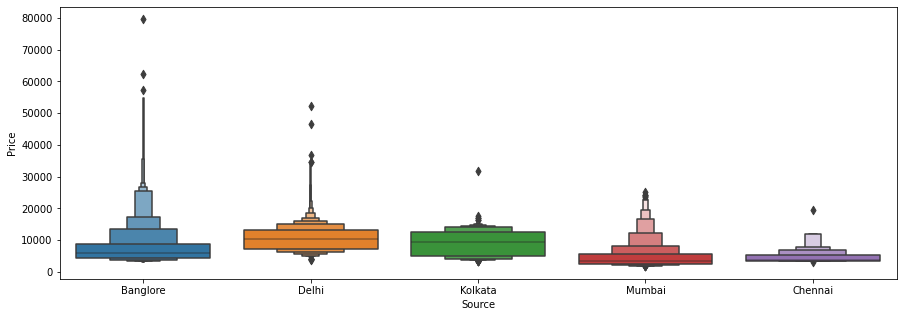

In [142]:
#Source vs Price
plt.figure(figsize=(15,5))
sns.boxenplot(x='Source',y='Price',data=df.sort_values('Price', ascending=False))
#sns.catplot(x='Source',y='Price',data=df.sort_values('Price', ascending=False),kind='boxen')

In [143]:
#OneHotEncoding
sources = pd.get_dummies(categorical_data['Source'],drop_first =True)
sources.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [144]:
categorical_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [145]:
#OneHotEncoding
destination = pd.get_dummies(categorical_data['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [146]:
categorical_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [147]:
#Splitting Route
def Route(i,col):
  categorical_data[col+'_'+str(i+1)] = categorical_data[col].str.split('→').str[i]

In [148]:
for i in range(5):
  Route(i,'Route')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [150]:
df.corr()['Price'].abs().sort_values(ascending=False)

Price                1.000000
Duration_hour        0.508778
Journey_Day          0.165448
Duration_min         0.124855
Arrival_Time_Min     0.086155
Dep_Time_Min         0.024458
Arrival_Time_Hour    0.024244
Journey_Month        0.010705
Dep_Time_Hour        0.006799
Name: Price, dtype: float64

In [151]:
categorical_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [152]:
# we can drop Route as well as we have pre-process that column
dropCol(categorical_data,'Airline')
dropCol(categorical_data,'Source')
dropCol(categorical_data,'Destination')
dropCol(categorical_data,'Route')

# Additional_Info contains almost 80% no_info,so we can drop this column
dropCol(categorical_data,'Additional_Info')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [153]:
categorical_data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'], dtype='object')

In [154]:
for col in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical_data[col].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [155]:
categorical_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,BLR,DEL,None,None,None
1,2 stops,CCU,IXR,BBI,BLR,None
2,2 stops,DEL,LKO,BOM,COK,None
3,1 stop,CCU,NAG,BLR,None,None
4,1 stop,BLR,NAG,DEL,None,None


In [156]:
#Looking at the unique values
def unique_values(col):
  print(f'{col} has {len(categorical_data[col].unique())} values')

In [157]:
for col in categorical_data.columns:
  unique_values(col)

Total_Stops has 5 values
Route_1 has 5 values
Route_2 has 45 values
Route_3 has 30 values
Route_4 has 14 values
Route_5 has 6 values


In [158]:
#since there is lots of different vaues in Routes so OnHotEncoding is not suitable here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [159]:
for col in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical_data[col] = le.fit_transform(categorical_data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
categorical_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,non-stop,0,13,29,13,5
1,2 stops,2,25,1,3,5
2,2 stops,3,32,4,5,5
3,1 stop,2,34,3,13,5
4,1 stop,0,34,8,13,5


In [161]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [162]:
# Since there are nominal number of stops out there in Total_Stops, so we can map them with there numeric values using dictionary (similar to OneHotEncoding)
#or we can say manual LabelEncoding using map technique(dictionary)
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4} 
dict

{'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 0}

In [163]:
categorical_data['Total_Stops']=categorical_data['Total_Stops'].map(dict) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
categorical_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5


In [165]:
# Concatenating all the dataframes created
df = pd.concat([categorical_data,Airline,sources,destination,df[cont_col]],axis=1)
df.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


Dealing with outliers

In [166]:
#OutLiers Detection
def outlierDetection(df,col):
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,3))
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


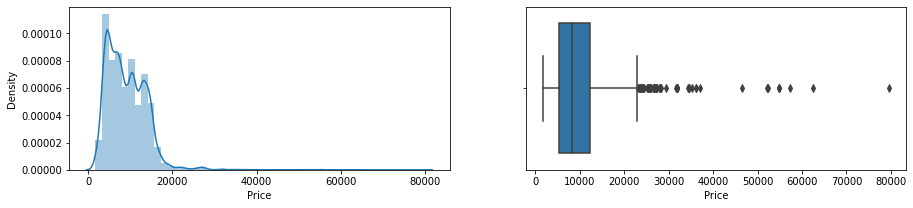

In [167]:
outlierDetection(df,'Price')

In [168]:
#treating Outliers
df['Price'] = np.where(df['Price']>= 40000,df['Price'].median(),df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


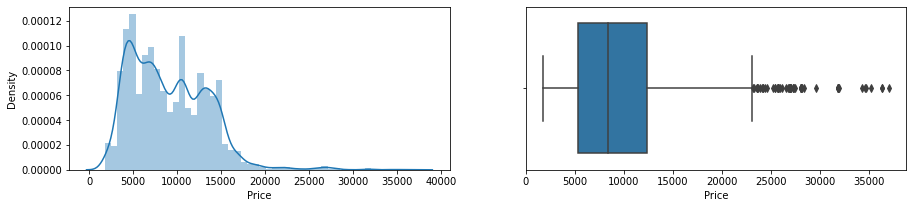

In [169]:
outlierDetection(df,'Price')

In [170]:
#Separating Variables
x = df.drop('Price',axis=1)
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


# Model Building

In [171]:
y = df['Price']

In [172]:
# checking for null values and found none 
#x.isna().sum().sort_values(ascending=True)

In [173]:
y.isna().sum()

0

In [174]:
#Since we do not have any missing values, so we are good to go for further processing
#Important Feature Selection using information gain (mutual information scores or matrix)

from sklearn.feature_selection import mutual_info_classif
imp_feat = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)


Important feature selection

In [175]:
imp_feat.columns = ['importance']
imp_feat.sort_values(by='importance',ascending=False)

,importance
Route_2,2.748830
Route_3,2.280960
Total_Stops,2.150131
Route_1,2.027613
Arrival_Time_Hour,1.848088
Duration_hour,1.772907
Delhi,1.544425
Arrival_Time_Min,1.523899
Cochin,1.512251
Route_4,1.457762


Splitting data for traing and testing

In [176]:
#Split dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [177]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

Aoutomate the process of model fitting

In [178]:
def results(ml_model):
  model = ml_model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)

  print(f'r2_core = {r2}')
  print(f'Mean Absolute Error = {mae}')
  print(f'Mean Square Erroe = {mse}')
  print(f'Root Mean Square Erroe = {rmse}')
  print('\n')

  #Show co-relation between actual value and predicted value 
  sns.scatterplot(x=y_test, y= y_pred)

In [179]:
from sklearn.ensemble import RandomForestRegressor

r2_core = 0.816502446366872
Mean Absolute Error = 1182.5094111716808
Mean Square Erroe = 3591101.7878659866
Root Mean Square Erroe = 1895.0202605423474




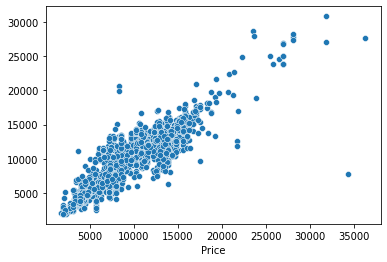

In [180]:
results(RandomForestRegressor())

# Cross Validation and Hyperparameter tuning

In [181]:
#HyperParaMeter Tuning
from sklearn.model_selection import RandomizedSearchCV

Form grid (dictionary) for hyperparameter tuning

In [182]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(5,30,num=4)]
max_features = ['auto','sqrt']
min_samples_split = [5,10,15,100]

In [183]:
rand_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [184]:
rand_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [185]:
#Using 3 fold cross validation
rand_search = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions=rand_grid,cv=3,verbose=2,n_jobs=-1)

In [186]:
rand_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

Best parameters obtained

In [187]:
rand_search.best_params_

{'max_depth': 13,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 320}

In [188]:
rand_search.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_split=5, n_estimators=320)

In [189]:
rand_search.best_score_

0.8352627306386204

In [190]:
rand_search.best_index_

8

In [191]:
tuned_model = RandomForestRegressor(max_depth=13,
 max_features='auto',
 min_samples_split=15,
 n_estimators=980)

r2_core = 0.8436596793934792
Mean Absolute Error = 1146.2141241328995
Mean Square Erroe = 3059626.6474925843
Root Mean Square Erroe = 1749.178849486977




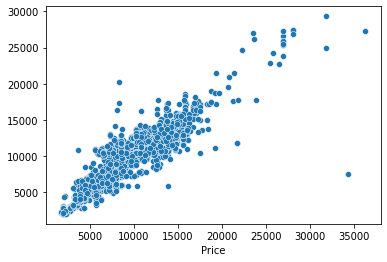

In [192]:
results(tuned_model)

# Saving Model

In [193]:
import joblib

model = RandomForestRegressor(
                            max_depth=13,
                            max_features='auto',
                            min_samples_split=15,
                            n_estimators=980
                            )

In [194]:
joblib.dump(model,'Airline_Price_prediction.obj')

['Airline_Price_prediction.obj']

# Thank you for visiting 
       
        :D